Validating Linear Regression Model - NYC Crimes

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as smf

from statsmodels.sandbox.regression.predstd import wls_prediction_std

from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.read_excel('Offenses_NYC_2014.xls',skiprows=4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 13 columns):
City                                    375 non-null object
Population                              369 non-null float64
Violent
crime                           369 non-null float64
Murder and
nonnegligent
manslaughter    369 non-null float64
Rape
(revised
definition)1              227 non-null float64
Rape
(legacy
definition)2               142 non-null float64
Robbery                                 369 non-null float64
Aggravated
assault                      369 non-null float64
Property
crime                          368 non-null float64
Burglary                                369 non-null float64
Larceny-
theft                          368 non-null float64
Motor
vehicle
theft                     369 non-null float64
Arson3                                  365 non-null float64
dtypes: float64(12), object(1)
memory usage: 36.8+ KB


In [4]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000


In [5]:
df.isnull().sum()

City                                        1
Population                                  7
Violent\ncrime                              7
Murder and\nnonnegligent\nmanslaughter      7
Rape\n(revised\ndefinition)1              149
Rape\n(legacy\ndefinition)2               234
Robbery                                     7
Aggravated\nassault                         7
Property\ncrime                             8
Burglary                                    7
Larceny-\ntheft                             8
Motor\nvehicle\ntheft                       7
Arson3                                     11
dtype: int64

In [6]:
df.dropna(thresh=235)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3


In [7]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [8]:
df.rename(columns={'Murder and\nnonnegligent\nmanslaughter':'Murder'}, inplace=True)
df.rename(columns={'Rape\n(revised\ndefinition)1':'rape1'}, inplace=True)
df.rename(columns={'Rape\n(legacy\ndefinition)2':'rape2'}, inplace=True)
df.rename(columns={'Aggravated\nassault':'agg_assault'}, inplace=True)
df.rename(columns={'Violent\ncrime':'violent_crime'}, inplace=True)
df.rename(columns={'Property\ncrime':'property_crime'}, inplace=True)
df.rename(columns={'Larceny-\ntheft':'larceny'}, inplace=True)
df.rename(columns={'Motor\nvehicle\ntheft':'vehicle_theft'}, inplace=True)

In [9]:
# Convert all columns to lower case.

df.columns = map(str.lower, df.columns)

In [10]:
df.arson3.describe()

count   365.000
mean      1.425
std       7.995
min       0.000
25%       0.000
50%       0.000
75%       1.000
max     135.000
Name: arson3, dtype: float64

In [11]:
# Replace arson3 NaN with mean
df.fillna(value=1, inplace=True)

In [12]:
df.columns

Index(['city', 'population', 'violent_crime', 'murder', 'rape1', 'rape2',
       'robbery', 'agg_assault', 'property_crime', 'burglary', 'larceny',
       'vehicle_theft', 'arson3'],
      dtype='object')

In [13]:
df.isnull().sum()

city              0
population        0
violent_crime     0
murder            0
rape1             0
rape2             0
robbery           0
agg_assault       0
property_crime    0
burglary          0
larceny           0
vehicle_theft     0
arson3            0
dtype: int64

In [16]:
df['population_sq'] = df['population']*df['population']

In [17]:
df.dtypes

city               object
population        float64
violent_crime     float64
murder            float64
rape1             float64
rape2             float64
robbery           float64
agg_assault       float64
property_crime    float64
burglary          float64
larceny           float64
vehicle_theft     float64
arson3            float64
population_sq     float64
dtype: object

In [18]:
df.describe()

,population,violent_crime,murder,rape1,rape2,robbery,agg_assault,property_crime,burglary,larceny,vehicle_theft,arson3,population_sq
count,376.000,376.000,376.000,376.000,376.000,376.000,376.000,376.000,376.000,376.000,376.000,376.000,376.000
mean,37110.843,180.290,1.444,9.787,0.625,59.551,109.939,683.524,99.040,550.838,33.697,1.412,191883774324.040
std,437052.145,2614.214,17.528,113.768,0.485,858.394,1625.201,7047.939,847.193,5807.468,403.166,7.877,3703151887328.392
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,2542.500,1.000,0.000,1.000,0.000,0.000,0.000,22.000,3.000,18.750,0.000,0.000,6464853.000
50%,6203.000,5.000,0.000,1.000,1.000,1.000,3.000,74.500,12.000,57.500,2.000,0.000,38524733.000
75%,15227.750,17.000,0.000,2.000,1.000,4.000,12.000,266.500,38.250,222.250,6.000,1.000,231884437.750
max,8473938.000,50564.000,333.000,2190.000,1.000,16581.000,31460.000,135747.000,15916.000,112107.000,7724.000,135.000,71807625227844.000


In [19]:
df.population.describe()

count       376.000
mean      37110.843
std      437052.145
min           1.000
25%        2542.500
50%        6203.000
75%       15227.750
max     8473938.000
Name: population, dtype: float64

Text(0,0.5,'population')

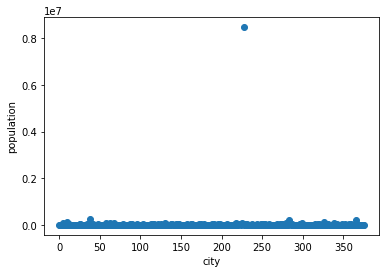

In [20]:
plt.scatter(x=df.index, y="population", data=df)
plt.xlabel('city')
plt.ylabel('population')

In [21]:
df[df['population'] > 100000]

,city,population,violent_crime,murder,rape1,rape2,robbery,agg_assault,property_crime,burglary,larceny,vehicle_theft,arson3,population_sq
9,Amherst Town4,118860.000,128.000,1.000,16.000,1.000,43.000,68.000,2066.000,176.000,1846.000,44.000,2.000,14127699600.000
38,Buffalo4,258419.000,3174.000,60.000,174.000,1.000,1277.000,1663.000,12449.000,3119.000,8362.000,968.000,1.000,66780379561.000
227,New York4,8473938.000,50564.000,333.000,2190.000,1.000,16581.000,31460.000,135747.000,15916.000,112107.000,7724.000,1.000,71807625227844.000
283,Rochester4,210347.000,1765.000,27.000,190.000,1.000,698.000,850.000,8856.000,2125.000,6058.000,673.000,135.000,44245860409.000
326,Syracuse4,144534.000,1164.000,20.000,70.000,1.000,406.000,668.000,5755.000,1404.000,3986.000,365.000,57.000,20890077156.000
366,Yonkers4,200624.000,974.000,3.000,33.000,1.000,358.000,580.000,2009.000,414.000,1395.000,200.000,15.000,40249989376.000


In [22]:
df = df[df.city != 'New York4']

In [23]:
df.population.describe()

count      375.000
mean     14612.637
std      26396.832
min          1.000
25%       2529.000
50%       5985.000
75%      15219.500
max     258419.000
Name: population, dtype: float64

Text(0,0.5,'population')

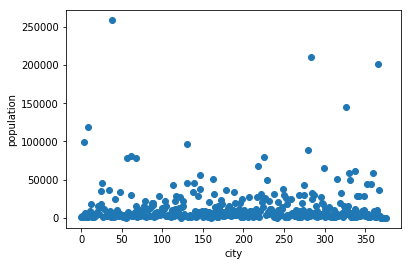

In [24]:
plt.scatter(x=df.index, y="population", data=df)
plt.xlabel('city')
plt.ylabel('population')

In [25]:
df.head()

,city,population,violent_crime,murder,rape1,rape2,robbery,agg_assault,property_crime,burglary,larceny,vehicle_theft,arson3,population_sq
0,Adams Village,1851.000,0.000,0.000,1.000,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,3426201.000
1,Addison Town and Village,2568.000,2.000,0.000,1.000,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,6594624.000
2,Afton Village4,820.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,672400.000
3,Akron Village,2842.000,1.000,0.000,1.000,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,8076964.000
4,Albany4,98595.000,802.000,8.000,54.000,1.000,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,9720974025.000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 375
Data columns (total 14 columns):
city              375 non-null object
population        375 non-null float64
violent_crime     375 non-null float64
murder            375 non-null float64
rape1             375 non-null float64
rape2             375 non-null float64
robbery           375 non-null float64
agg_assault       375 non-null float64
property_crime    375 non-null float64
burglary          375 non-null float64
larceny           375 non-null float64
vehicle_theft     375 non-null float64
arson3            375 non-null float64
population_sq     375 non-null float64
dtypes: float64(13), object(1)
memory usage: 42.5+ KB


In [27]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime']
X = df[['population', 'population_sq', 'murder', 'robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', regr.score(X, Y))


Coefficients: 
 [ 2.03163510e-02 -5.17326898e-08  1.31574384e+02  2.58621944e+00]

Intercept: 
 -40.27434280488234

R-squared: 
 0.9304924167497782


In [28]:
Y = df['property_crime'].values.reshape(-1, 1)

min_max_scaler = preprocessing.MinMaxScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
Y_train_minmax = min_max_scaler.fit_transform(Y_train)
Y_test_minmax = min_max_scaler.transform(Y_test)


In [29]:
# Scale data

regr.fit(X_train_minmax, Y_train_minmax) 

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_train_minmax, Y_train_minmax))

Coefficients: 
 [[ 0.4792787  -0.57971177  0.34462336  0.68802278]]
Intercept: 
 [-0.00432243]
0.9376856255732421


In [30]:
# Scale data

regr.fit(X_test_minmax, Y_test_minmax) 

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_test_minmax, Y_test_minmax))

Coefficients: 
 [[ 0.30115326  0.69502928 -0.13131852  0.15713769]]
Intercept: 
 [-0.00072397]
0.9762574195100425


In [31]:
regr.fit(X_train, Y_train)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_train, Y_train))

Coefficients: 
 [[ 2.01786207e-02 -1.16031813e-07  1.13036461e+02  8.72941220e+00]]
Intercept: 
 [-38.299584]
0.937685625573242


In [32]:
regr.fit(X_test, Y_test)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_test, Y_test))

Coefficients: 
 [[ 1.26791726e-02  1.39113112e-07 -4.30724749e+01  1.99371253e+00]]
Intercept: 
 [-6.42416832]
0.9762574195100425


In [33]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime']
X = df[['population', 'population_sq', 'murder', 'robbery', 'violent_crime', 'rape2', 'agg_assault', \
        'burglary', 'larceny', 'vehicle_theft', 'arson3']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', regr.score(X, Y))


Coefficients: 
 [ 2.20524574e-06 -2.02990404e-11 -1.09066723e-01 -1.45210812e-03
  4.17480356e-03 -1.09239913e-01 -5.79161078e-03  1.00128897e+00
  9.99930119e-01  1.00229064e+00 -1.27903115e-02]

Intercept: 
 -0.01965158263487865

R-squared: 
 0.9999998545555605


In [34]:
X1 = df[['population', 'population_sq']]

In [35]:
X1.head()

,population,population_sq
0,1851.000,3426201.000
1,2568.000,6594624.000
2,820.000,672400.000
3,2842.000,8076964.000
4,98595.000,9720974025.000


In [34]:
X2 = smf.add_constant(X1)
est = smf.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         property_crime   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     922.5
Date:                Tue, 19 Jun 2018   Prob (F-statistic):          6.40e-145
Time:                        08:48:56   Log-Likelihood:                -2767.6
No. Observations:                 375   AIC:                             5541.
Df Residuals:                     372   BIC:                             5553.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.3569     26.605      0.314

In [46]:
X3 = df[['population', 'population_sq', 'murder', 'robbery', 'violent_crime', 'rape2', 'agg_assault', \
        'burglary', 'larceny', 'vehicle_theft', 'arson3']]

In [47]:
X3.corr()

,population,population_sq,murder,robbery,violent_crime,rape2,agg_assault,burglary,larceny,vehicle_theft,arson3
population,1.000,0.887,0.724,0.815,0.830,0.196,0.830,0.818,0.893,0.814,0.557
population_sq,0.887,1.000,0.873,0.936,0.929,0.120,0.915,0.895,0.869,0.930,0.552
murder,0.724,0.873,1.000,0.966,0.953,0.078,0.935,0.951,0.866,0.964,0.476
robbery,0.815,0.936,0.966,1.000,0.994,0.100,0.982,0.963,0.895,0.984,0.537
violent_crime,0.830,0.929,0.953,0.994,1.000,0.119,0.996,0.973,0.913,0.977,0.557
rape2,0.196,0.120,0.078,0.100,0.119,1.000,0.124,0.126,0.177,0.101,0.098
agg_assault,0.830,0.915,0.935,0.982,0.996,0.124,1.000,0.964,0.907,0.960,0.541
burglary,0.818,0.895,0.951,0.963,0.973,0.126,0.964,1.000,0.949,0.980,0.635
larceny,0.893,0.869,0.866,0.895,0.913,0.177,0.907,0.949,1.000,0.915,0.609
vehicle_theft,0.814,0.930,0.964,0.984,0.977,0.101,0.960,0.980,0.915,1.000,0.622


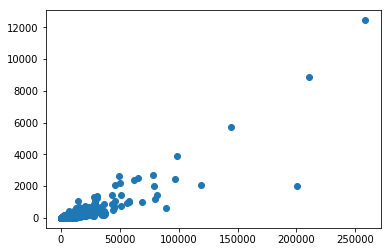

In [39]:
plt.scatter(df.population, df.property_crime)
plt.show()

In [41]:
X4 = smf.add_constant(X3)
est3 = smf.OLS(Y, X4)
est4 = est3.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:         property_crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.488e+19
Date:                Tue, 26 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:41:08   Log-Likelihood:                 4632.8
No. Observations:                 375   AIC:                            -9240.
Df Residuals:                     362   BIC:                            -9189.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.102e-07   9.85e-08      2.

In [42]:
X.head()

,population,population_sq,murder,robbery,violent_crime,rape2,agg_assault,burglary,larceny,vehicle_theft,arson3
0,1851.000,3426201.000,0.000,0.000,0.000,0.000,0.000,1.000,10.000,0.000,0.000
1,2568.000,6594624.000,0.000,1.000,2.000,0.000,1.000,1.000,47.000,1.000,0.000
2,820.000,672400.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
3,2842.000,8076964.000,0.000,0.000,1.000,0.000,1.000,0.000,17.000,0.000,0.000
4,98595.000,9720974025.000,8.000,237.000,802.000,1.000,503.000,683.000,3083.000,122.000,12.000


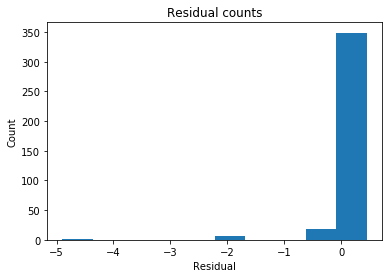

In [43]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [44]:
X.corr() 

,population,population_sq,murder,robbery,violent_crime,rape2,agg_assault,burglary,larceny,vehicle_theft,arson3
population,1.000,0.887,0.724,0.815,0.830,0.196,0.830,0.818,0.893,0.814,0.557
population_sq,0.887,1.000,0.873,0.936,0.929,0.120,0.915,0.895,0.869,0.930,0.552
murder,0.724,0.873,1.000,0.966,0.953,0.078,0.935,0.951,0.866,0.964,0.476
robbery,0.815,0.936,0.966,1.000,0.994,0.100,0.982,0.963,0.895,0.984,0.537
violent_crime,0.830,0.929,0.953,0.994,1.000,0.119,0.996,0.973,0.913,0.977,0.557
rape2,0.196,0.120,0.078,0.100,0.119,1.000,0.124,0.126,0.177,0.101,0.098
agg_assault,0.830,0.915,0.935,0.982,0.996,0.124,1.000,0.964,0.907,0.960,0.541
burglary,0.818,0.895,0.951,0.963,0.973,0.126,0.964,1.000,0.949,0.980,0.635
larceny,0.893,0.869,0.866,0.895,0.913,0.177,0.907,0.949,1.000,0.915,0.609
vehicle_theft,0.814,0.930,0.964,0.984,0.977,0.101,0.960,0.980,0.915,1.000,0.622


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [1.00000000e+00 6.19144639e-12 3.81727560e-15 2.66885335e-16]


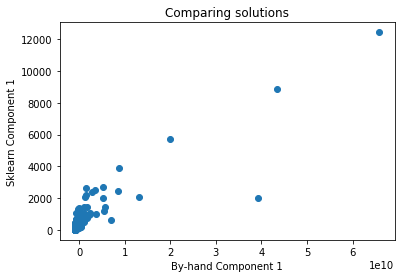

In [45]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [51]:
X5 = df[['population','population_sq', 'murder', 'robbery', 'violent_crime']]

In [52]:
X5.head()

,population,population_sq,murder,robbery,violent_crime
0,1851.000,3426201.000,0.000,0.000,0.000
1,2568.000,6594624.000,0.000,1.000,2.000
2,820.000,672400.000,0.000,0.000,0.000
3,2842.000,8076964.000,0.000,0.000,1.000
4,98595.000,9720974025.000,8.000,237.000,802.000


In [53]:
X6 = smf.add_constant(X5)
est5 = smf.OLS(Y, X6)
est6 = est5.fit()
print(est6.summary())

                            OLS Regression Results                            
Dep. Variable:         property_crime   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1270.
Date:                Tue, 26 Jun 2018   Prob (F-statistic):          5.19e-230
Time:                        17:58:40   Log-Likelihood:                -2558.2
No. Observations:                 375   AIC:                             5128.
Df Residuals:                     369   BIC:                             5152.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -33.6179     15.464     -2.174

In [58]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime']
X5 = df[['population','population_sq', 'murder', 'robbery', 'violent_crime']]
regr.fit(X5, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n', regr.score(X5, Y))


Coefficients: 
 [ 1.67220689e-02 -2.61481466e-08  1.55504176e+02 -1.21901163e+01
  5.18483773e+00]

Intercept: 
 -33.61790112702829

R-squared: 
 0.9450853905214396


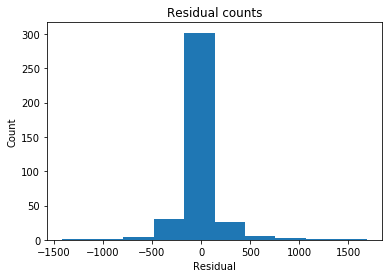

In [59]:
# Extract predicted values.
predicted = regr.predict(X5).ravel()
actual = df['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

With 20% Holdout: -0.40096203166804667


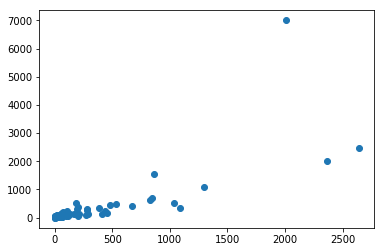

In [83]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X6, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
# print('Testing on Sample: ' + str(regr.fit(X6, Y).score(X6, Y)))
plt.scatter(y_test, regr.predict(X_test))

In [78]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X6, Y, cv=10)

array([ 0.96127835,  0.95987546,  0.72284646,  0.63611432,  0.68898101,
        0.36769855,  0.85654076,  0.9150777 ,  0.98658767, -2.29059502])

I chose the validation model which included: 'population','population_sq', 'murder', 'robbery', 'violent_crime', because it gave a high R-squared (94.5) and normally distributed residuals.  Unfortunately, it also overfit when I used a holdout training set.  The cross-validation evaluation gave the same results.